In [19]:
#电信客户流失预测
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report

In [20]:
#数据预处理
def dm01():
    #读取数据文件
    data = pd.read_csv('./churn.csv')
    #data.info()
    #因为churn和gender是字符串 所以进行onehot编码
    data = pd.get_dummies(data)
    #data.info()
    #去除不需要的或者多余的列
    data.drop(['Churn_No','gender_Male'],axis=1, inplace=True)#axis=1删除列 直接修改源数据
    #data.info()
    #修改列名字
    data.rename(columns={'Churn_Yes':'flag'}, inplace=True)
    #data.info()
    #数据不均衡
    print(data.flag.value_counts())
dm01()

flag
False    5174
True     1869
Name: count, dtype: int64


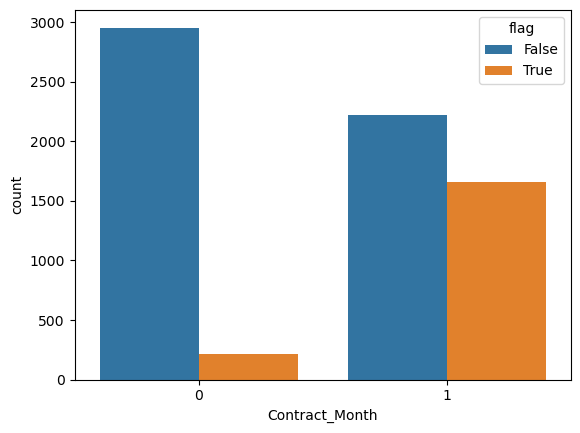

In [21]:
#可视化
def dm02():
    data = pd.read_csv('./churn.csv')
    data = pd.get_dummies(data)
    data.drop(['Churn_No','gender_Male'],axis=1, inplace=True)#axis=1删除列 直接修改源数据
    #data.info()
    #修改列名字
    data.rename(columns={'Churn_Yes':'flag'}, inplace=True)
    #列名字为['Partner_att', 'Dependents_att', 'landline', 'internet_att',
       #'internet_other', 'StreamingTV', 'StreamingMovies', 'Contract_Month',
       #'Contract_1YR', 'PaymentBank', 'PaymentCreditcard', 'PaymentElectronic',
       #'MonthlyCharges', 'TotalCharges', 'flag', 'gender_Female']
    #查看列名字
    #print(data.columns)
    #数据的可视化  计数柱状图
    sns.countplot(data = data,x = 'Contract_Month',hue = 'flag')#月度会员  hue根据是否流失进行分组
    plt.show()
dm02()

In [22]:
#模型训练与评测
def dm03():
    data = pd.read_csv('./churn.csv')
    data = pd.get_dummies(data)
    data.drop(['Churn_No','gender_Male'],axis=1, inplace=True)#axis=1删除列 直接修改源数据
    #data.info()
    #修改列名字
    data.rename(columns={'Churn_Yes':'flag'}, inplace=True)
    #特征 选择
    x = data[['Contract_Month', 'internet_other', 'PaymentElectronic']]
    y = data['flag']
    #模型分割
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23)
    #创建模型
    estimator = LogisticRegression()
    #模型训练
    estimator.fit(x_train,y_train)
    #模型预测
    y_pred = estimator.predict(x_test)
    print(y_pred)
    #模型评估
    print(f'准确率: {accuracy_score(y_test, y_pred)}')
    print(f'准确率: {estimator.score(x_test, y_test)}')

    # 计算AUC值.
    print(f'AUC值: {roc_auc_score(y_test, y_pred)}')
    #分类评估报告
    #macro avg 宏平均 不考虑样本权重
    #weighted avg 权重平均 适用于数据不均衡
    print(f'分类评估报告:\n{classification_report(y_test,y_pred)}')
dm03()

[False False  True ... False  True False]
准确率: 0.7679205110007097
准确率: 0.7679205110007097
AUC值: 0.6522031999166147
分类评估报告:
              precision    recall  f1-score   support

       False       0.81      0.90      0.85      1040
        True       0.58      0.41      0.48       369

    accuracy                           0.77      1409
   macro avg       0.70      0.65      0.67      1409
weighted avg       0.75      0.77      0.75      1409

